# PCA WITH MODELS

In [15]:
import pandas as pd
dt=pd.read_csv("sales_data_sample.csv",encoding='latin-1')
pd.set_option('display.max_columns',None)
dt.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Preprocessing 

In [16]:
dt.shape

(2823, 25)

In [17]:
dt.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [18]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [19]:
dt.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [20]:
dt['ADDRESSLINE2']=dt['ADDRESSLINE2'].fillna(dt['ADDRESSLINE2'].mode()[0])
dt['POSTALCODE']=dt['POSTALCODE'].fillna(dt['POSTALCODE'].mode()[0])
dt['STATE']=dt['STATE'].fillna(dt['STATE'].mode()[0])
dt['TERRITORY']=dt['TERRITORY'].fillna(dt['TERRITORY'].mode()[0])
dt.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

# Feature Engineering

In [21]:
dt.duplicated().sum()

np.int64(0)

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dt['ORDERDATE']=le.fit_transform(dt['ORDERDATE'])
dt['STATUS']=le.fit_transform(dt['STATUS'])
dt['PRODUCTLINE']=le.fit_transform(dt['PRODUCTLINE'])
dt['PRODUCTCODE']=le.fit_transform(dt['PRODUCTCODE'])
dt['CUSTOMERNAME']=le.fit_transform(dt['CUSTOMERNAME'])
dt['PHONE']=le.fit_transform(dt['PHONE'])
dt['ADDRESSLINE1']=le.fit_transform(dt['ADDRESSLINE1'])
dt['CITY']=le.fit_transform(dt['CITY'])
dt['COUNTRY']=le.fit_transform(dt['COUNTRY'])
dt['CONTACTFIRSTNAME']=le.fit_transform(dt['CONTACTFIRSTNAME'])
dt['CONTACTLASTNAME']=le.fit_transform(dt['CONTACTLASTNAME'])
dt['DEALSIZE']=le.fit_transform(dt['DEALSIZE'])
dt['ADDRESSLINE2']=le.fit_transform(dt['ADDRESSLINE2'])
dt['STATE']=le.fit_transform(dt['STATE'])
dt['TERRITORY']=le.fit_transform(dt['TERRITORY'])
dt['POSTALCODE']=le.fit_transform(dt['POSTALCODE'])
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   int64  
 6   STATUS            2823 non-null   int64  
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   int64  
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   int64  
 13  CUSTOMERNAME      2823 non-null   int64  
 14  PHONE             2823 non-null   int64  
 15  ADDRESSLINE1      2823 non-null   int64  
 16  ADDRESSLINE2      2823 non-null   int64  


In [23]:
from sklearn.preprocessing import StandardScaler
x=dt
sc=StandardScaler()
x_scale=sc.fit_transform(x)
x_scale

array([[-1.64794709, -0.52289086,  0.5969775 , ...,  1.69882335,
        -0.02631285,  1.01535268],
       [-1.4958875 , -0.11220131, -0.11445035, ..., -0.53298227,
         0.8302286 ,  1.01535268],
       [-1.35468931,  0.60650538,  0.54938372, ..., -1.04443773,
        -1.21595376, -0.672716  ],
       ...,
       [ 1.38238338,  0.81185016,  0.81015797, ..., -0.67247013,
        -1.12078249, -0.672716  ],
       [ 1.50185877, -0.11220131, -1.06186404, ...,  0.90839219,
        -1.50146758,  1.01535268],
       [ 1.68650256,  1.2225397 , -0.89925195, ...,  1.60583145,
        -0.2166554 , -0.672716  ]], shape=(2823, 25))

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
p=pca.fit_transform(x_scale)
x_scale

array([[-1.64794709, -0.52289086,  0.5969775 , ...,  1.69882335,
        -0.02631285,  1.01535268],
       [-1.4958875 , -0.11220131, -0.11445035, ..., -0.53298227,
         0.8302286 ,  1.01535268],
       [-1.35468931,  0.60650538,  0.54938372, ..., -1.04443773,
        -1.21595376, -0.672716  ],
       ...,
       [ 1.38238338,  0.81185016,  0.81015797, ..., -0.67247013,
        -1.12078249, -0.672716  ],
       [ 1.50185877, -0.11220131, -1.06186404, ...,  0.90839219,
        -1.50146758,  1.01535268],
       [ 1.68650256,  1.2225397 , -0.89925195, ...,  1.60583145,
        -0.2166554 , -0.672716  ]], shape=(2823, 25))

In [25]:
print("egenvalues")
print(pca.explained_variance_)
print("eigenvectors")
print(pca.components_)

egenvalues
[3.43931615 2.60507743 1.96165272 1.75506289 1.6355371  1.48035666]
eigenvectors
[[ 0.02029205  0.21437851  0.41988517 -0.03673048  0.4974339   0.00115641
   0.00186362 -0.00837298 -0.0106697   0.02004172 -0.1489855   0.44112681
  -0.28191169  0.01985288  0.02018869 -0.02021862  0.03072481  0.0151951
   0.00476501 -0.0033572   0.02076757  0.02468104  0.00252374  0.01104578
  -0.47759242]
 [ 0.35400978  0.06586575 -0.0243302  -0.05316306  0.01265088  0.11763406
  -0.16899183 -0.4993624  -0.49346862  0.51656753  0.02019654 -0.03793211
   0.04549557  0.05437133 -0.06899417  0.07954208 -0.14565006  0.03654939
  -0.0952077   0.03157863 -0.08135032 -0.0362812  -0.04579655 -0.0632003
  -0.00714705]
 [-0.08881092  0.05591606 -0.04841302  0.03656647 -0.00694334 -0.00535748
   0.08242838 -0.12077992 -0.1298167  -0.01784331  0.01515447 -0.04128266
   0.02965289  0.31087461  0.3703808  -0.24137305  0.0122789   0.1812762
  -0.1811368   0.33520865  0.41438626  0.32058843  0.22906438  0.38

In [26]:
trans=pd.DataFrame(p,columns=["pca1","pca2","pca3","pca4","pca5","pca6"])
trans.to_csv("sales_data_pca.csv")
trans

,pca1,pca2,pca3,pca4,pca5,pca6
0,0.024416,-0.244831,0.430512,1.859464,-2.228469,1.882228
1,-0.257124,-0.439100,0.743227,0.594967,-2.199495,-0.053487
2,1.241003,-0.791225,-0.788051,-0.485756,-1.736539,0.258963
3,1.126448,-1.157345,2.198887,-0.392149,-0.935096,0.722080
4,1.830636,-2.244147,0.135369,0.129258,-0.272874,-0.488494
...,...,...,...,...,...,...
2818,-1.987512,-0.707783,-1.710073,-1.277582,1.128903,-0.318233
2819,-0.239968,2.969066,1.179021,0.263080,0.442592,-0.943644
2820,0.359793,3.198355,-1.218783,-0.869712,0.829705,1.011920
2821,-2.222563,2.765517,-0.069978,2.275034,0.146078,0.250431


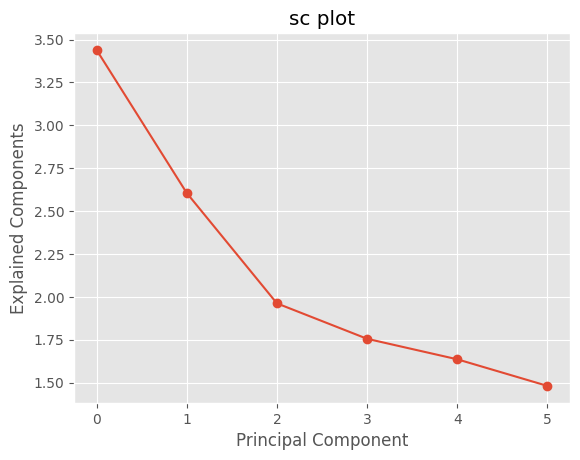

In [28]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.plot(pca.explained_variance_,marker='o')
plt.title("sc plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Components")
plt.show()

In [29]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
p=pca.fit_transform(x_scale)
y_output=pca.fit_transform(x_scale)
y_output

array([[ 0.02441607, -0.24483086],
       [-0.25712432, -0.43910012],
       [ 1.24100335, -0.79122484],
       ...,
       [ 0.35979345,  3.19835538],
       [-2.22256291,  2.76551714],
       [-0.88509996,  2.40028889]], shape=(2823, 2))

In [30]:
y_output.shape

(2823, 2)

In [ ]:
y_output.columns

# K-Means Clustering


In [45]:
from sklearn.cluster import KMeans
km=KMeans(random_state=1)
km.fit(y_output)

KMeans(random_state=1)

In [46]:
km.cluster_centers_

array([[ 0.6584755 ,  2.16371255],
       [ 0.66660456, -0.26744538],
       [ 3.48840341, -0.78795164],
       [-1.94388512,  0.24429029],
       [-1.68505058,  2.46080024],
       [ 1.29664739, -1.86927796],
       [-1.6396229 , -1.55304857],
       [ 2.76766952,  1.93350107]])

In [47]:
km.inertia_

2607.621351896851

In [48]:
lab=km.labels_
lab

array([1, 1, 1, ..., 0, 4, 4], shape=(2823,), dtype=int32)

In [49]:
from sklearn.metrics import silhouette_score
si=silhouette_score(y_output,km.labels_)
print(si)

0.350814404084677


In [50]:
import matplotlib.pyplot as plt

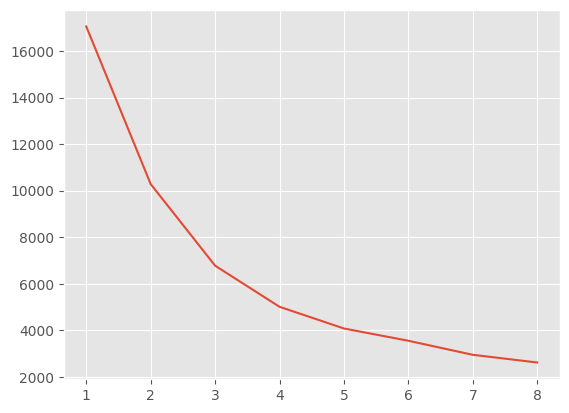

In [51]:
from sklearn.cluster import KMeans
cc=[]
for i in range(1,9):
    km=KMeans(n_clusters=i,init='k-means++',random_state=2)
    km.fit(y_output)
    cc.append(km.inertia_)
plt.plot(range(1,9),cc)
plt.show()

In [53]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=2)
km.fit(y_output)
lab=km.fit_predict(y_output)
lab
from sklearn.metrics import silhouette_score
si=silhouette_score(y_output,km.labels_)
print(si)

0.3971844929464561


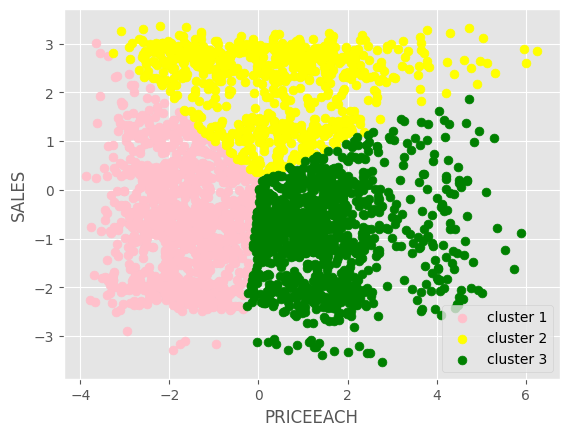

In [ ]:
import matplotlib.pyplot as plt
x =y_output
plt.scatter(x[km.labels_==0,0],x[km.labels_==0,1],s=40,c='pink',label='cluster 1')
plt.scatter(x[km.labels_==1,0],x[km.labels_==1,1],s=40,c='yellow',label='cluster 2')
plt.scatter(x[km.labels_==2,0],x[km.labels_==2,1],s=40,c='green',label='cluster 3')
plt.xlabel('PRICEEACH')
plt.ylabel('SALES')
plt.legend()
plt.show()

# Hierarichal Clustering

In [61]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering()
ag.fit(y_output)

AgglomerativeClustering()

In [62]:
ag.linkage

'ward'

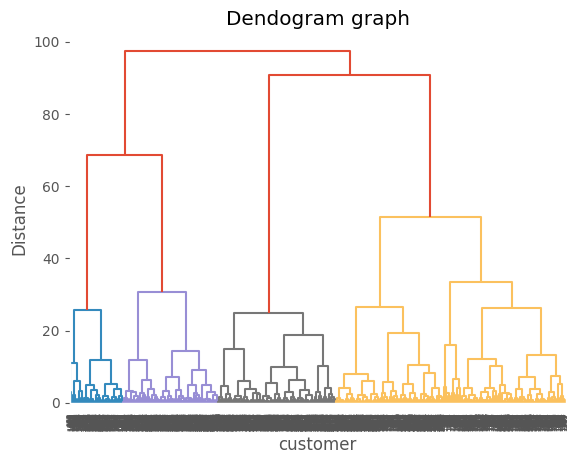

In [63]:
import scipy.cluster.hierarchy as cl 
plt.Figure(figsize=(17,9))
den=cl.dendrogram(cl.linkage(y_output,method='ward'))
plt.title('Dendogram graph')
plt.xlabel('customer')
plt.ylabel('Distance')
plt.show()

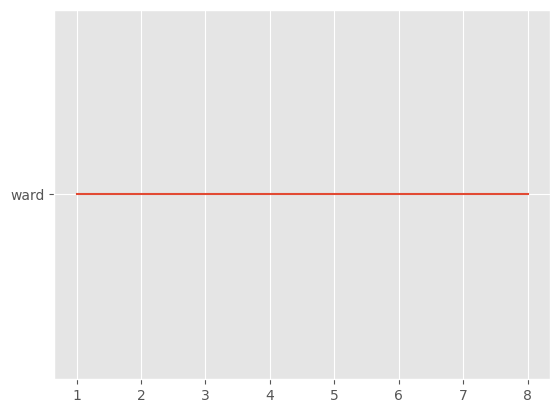

In [66]:
from sklearn.cluster import AgglomerativeClustering
ds=[]
for i in range(1,9):
    ag=AgglomerativeClustering(n_clusters=i,linkage='ward')
    ag.fit(y_output)
    ds.append(ag.linkage)
plt.plot(range(1,9),ds) 
plt.show()   

In [67]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=4,linkage='ward')
ag_mean=ag.fit_predict(y_output)
ag_mean

array([0, 0, 0, ..., 3, 1, 1], shape=(2823,))

In [68]:
labels=ag.labels_
labels

array([0, 0, 0, ..., 3, 1, 1], shape=(2823,))

# Single Linkage

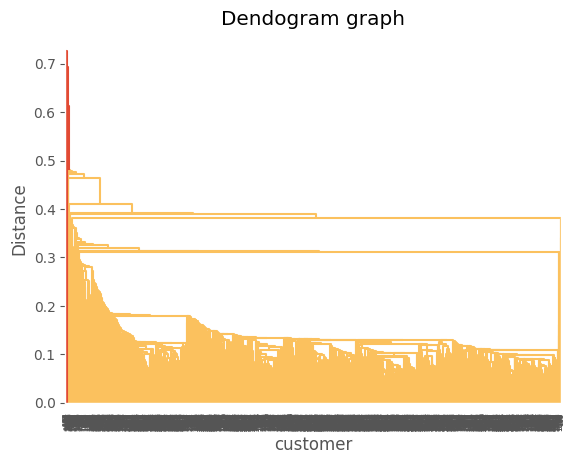

In [69]:
import scipy.cluster.hierarchy as cl 
plt.Figure(figsize=(17,9))
den=cl.dendrogram(cl.linkage(y_output,method='single'))
plt.title('Dendogram graph')
plt.xlabel('customer')
plt.ylabel('Distance')
plt.show()

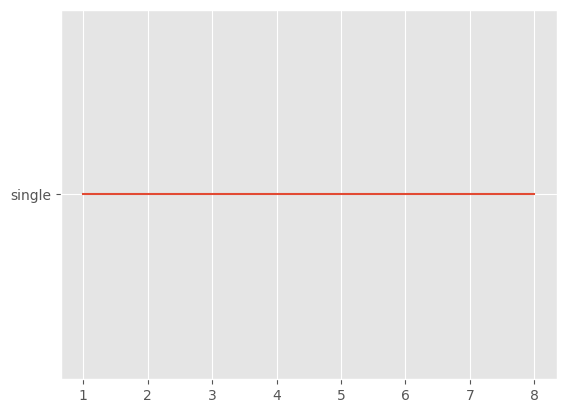

In [70]:
from sklearn.cluster import AgglomerativeClustering
sd=[]
for i in range(1,9):
    ag=AgglomerativeClustering(n_clusters=i,linkage='single')
    ag.fit(y_output)
    sd.append(ag.linkage)
plt.plot(range(1,9),sd) 
plt.show()   

In [71]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=4,linkage='single')
y_means=ag.fit_predict(y_output)
y_means

array([0, 0, 0, ..., 0, 0, 0], shape=(2823,))

# Complete Linkage

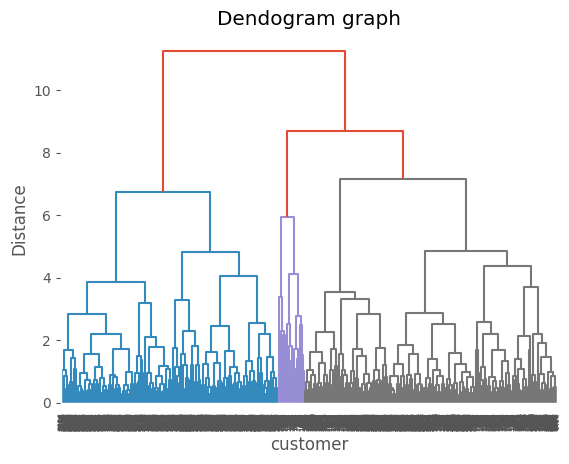

In [72]:
import scipy.cluster.hierarchy as cl 
plt.Figure(figsize=(17,9))
den=cl.dendrogram(cl.linkage(y_output,method='complete'))
plt.title('Dendogram graph')
plt.xlabel('customer')
plt.ylabel('Distance')
plt.show()

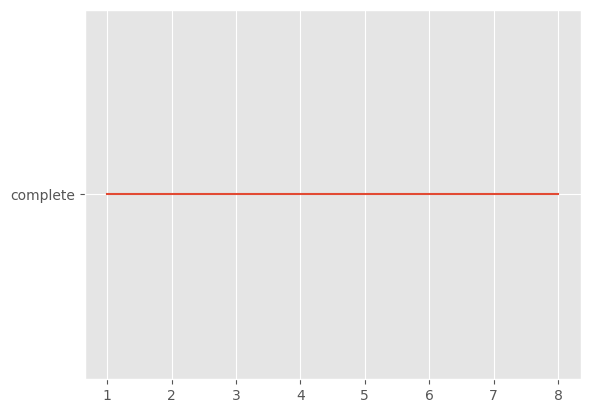

In [73]:
from sklearn.cluster import AgglomerativeClustering
sa=[]
for i in range(1,9):
    ag=AgglomerativeClustering(n_clusters=i,linkage='complete')
    ag.fit(y_output)
    sa.append(ag.linkage)
plt.plot(range(1,9),sa) 
plt.show()   

In [74]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=4,linkage='complete')
y_mn=ag.fit_predict(y_output)
y_mn

array([1, 1, 1, ..., 3, 0, 0], shape=(2823,))

In [75]:
from sklearn.metrics import silhouette_score
sil=silhouette_score(y_output,ag.labels_)
print(sil)

0.32700297481455565


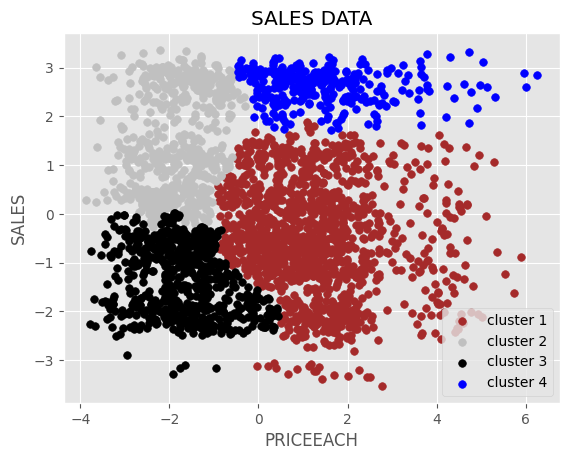

In [78]:
x=y_output
plt.scatter(x[ag_mean==0,0], x[ag_mean==0,1],s=30,c='brown',label='cluster 1')
plt.scatter(x[ag_mean==1,0], x[ag_mean==1,1],s=30,c='silver',label='cluster 2')
plt.scatter(x[ag_mean==2,0], x[ag_mean==2,1],s=30,c='black',label='cluster 3')
plt.scatter(x[ag_mean==3,0], x[ag_mean==3,1],s=30,c='blue',label='cluster 4')
plt.legend()
plt.title('SALES DATA')
plt.xlabel('PRICEEACH')
plt.ylabel('SALES')
plt.show()

# DBSCAN Clustering

In [79]:
from sklearn.cluster import DBSCAN
DB=DBSCAN(eps=0.5,min_samples=3)
DB.fit(y_output)

DBSCAN(min_samples=3)

In [80]:
from sklearn.metrics import silhouette_score
s=silhouette_score(y_output,ag.labels_,sample_size=23)
print(s)

0.306406294090933


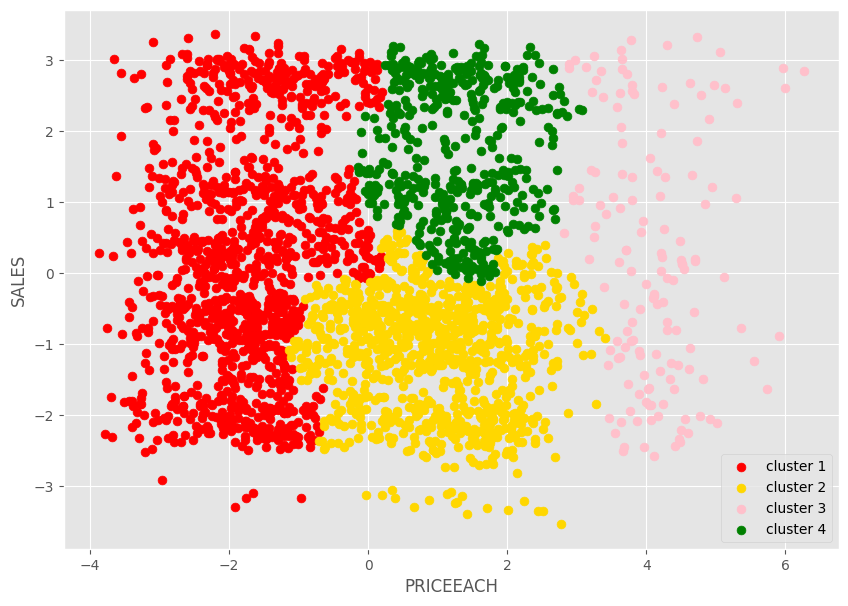

In [83]:
plt.figure(figsize=(10,7))
x=y_output
plt.scatter(x[ag.labels_==0,0],x[ag.labels_==0,1],s=40,c='red',label='cluster 1')
plt.scatter(x[ag.labels_==1,0],x[ag.labels_==1,1],s=40,c='gold',label='cluster 2')
plt.scatter(x[ag.labels_==2,0],x[ag.labels_==2,1],s=40,c='pink',label='cluster 3')
plt.scatter(x[ag.labels_==3,0],x[ag.labels_==3,1],s=40,c='green',label='cluster 4')
plt.xlabel('PRICEEACH')
plt.ylabel('SALES')
plt.legend()
plt.show()